In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def sort_data(df):
    df_result = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
    for filename in df['ccl_grana_filename']:
        new_name = filename.replace("..\\ccl_data\\jpg_files\\","")
        name_list = new_name.split('\\')
        prop_list = name_list[2].split('=')
        node_number = int(prop_list[1].replace('d',''))
        degree = int(prop_list[2].split("_")[0])
        ccl_grana = int(df.loc[df['ccl_grana_filename'] == filename, 'ccl_grana_processing_time(ms)'].values[0])*0.001
        ccl_wu = int(df.loc[df['ccl_grana_filename'] == filename, 'ccl_wu_processing_time(ms)'].values[0])*0.001
        ct = int(df.loc[df['ccl_grana_filename'] == filename, 'findContours_processing_time(ms)'].values[0])*0.001
        df_result.loc[len(df_result.index)] = [name_list[0], name_list[1], node_number, degree, ccl_grana, ccl_wu, ct]
    return df_result


# 生成x轴nodes_number的数据

In [3]:
def draw_bar(_type, d, fd, grana, wu, ct, size=4, total_width=0.6, n=2):
    target_path = "..//Excel2Graph//bar"
    nodes_number_value = [500, 1000, 2000, 3000]
    x=np.arange(4)#柱状图在横坐标上的位置
    width = total_width / n
    x = x - (total_width - width) / 2
    fname = "Type="+_type+"_d="+str(d)+"_FD="+fd+".pdf"
    plt.bar(x, grana,  width=width, label='CCL_Grana')
    plt.bar(x+width, wu, width=width, label='CCL_Wu')
    plt.bar(x+width*2, ct, width=width, label='CT')
    # 功能2
    for i, j in zip(x, grana):
        plt.text(i, j + 0.01, "%.2f" % j, ha="center", va="bottom", fontsize=7)
    for i, j in zip(x + width, wu):
        plt.text(i, j + 0.01, "%.2f" % j, ha="center", va="bottom", fontsize=7)
    for i, j in zip(x + 2 * width, ct):
        plt.text(i, j + 0.01, "%.2f" % j, ha="center", va="bottom", fontsize=7)

    
    plt.legend()
    plt.xticks(x+total_width/2,nodes_number_value)#显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
    plt.title("Type="+_type+", degree="+str(d)+", FD algorithm="+fd)
    plt.ylabel('Processing Time(s)')
    plt.xlabel('Number of Nodes')
#     plt.savefig(os.path.join(target_path, fname),bbox_inches ="tight", pad_inches = 1,transparent = True) 
    plt.savefig(os.path.join(target_path, fname),bbox_inches ="tight") 
    plt.show()

In [4]:
def time_bar_generate(sorted_df, _type, degree, FD_list):
    nodes_number_list = [500, 1000, 2000, 3000]
#     FD_list = ["DH","FA2","FDGE","FR","FRR","FRU","JIGGLE","KK","KK_W","LINLOG"]
    for fd in FD_list:
        print(fd)
        ccl_grana_list = []
        ccl_wu_list = []
        ct_list = []
        for number in nodes_number_list:
            ccl_grana_list.append(sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) & (sorted_df['Degree'] == degree) & (sorted_df['Nodes_Number'] == number) & (sorted_df['Type'] == _type), 'CCL_Grana_Time'].values[0])
            ccl_wu_list.append(sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) & (sorted_df['Degree'] == degree) & (sorted_df['Nodes_Number'] == number) & (sorted_df['Type'] == _type), 'CCL_Wu_Time'].values[0])
            ct_list.append(sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) & (sorted_df['Degree'] == degree) & (sorted_df['Nodes_Number'] == number) & (sorted_df['Type'] == _type), 'CT_Time'].values[0])
        print(ccl_grana_list)
        draw_bar(_type, degree, fd, ccl_grana_list, ccl_wu_list, ct_list)

# 根据类型，Degree，Number of Nodes，FD_list 选出数据

In [5]:
def excel_data_output(sorted_df, _type, degree, FD_list):
    nodes_number_list = [500, 1000, 2000, 3000]
    result_df = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
    for fd in FD_list:
        temp_df = pd.DataFrame(columns=['Type', 'FD_Algorithm', 'Nodes_Number', 'Degree', 'CCL_Grana_Time', 'CCL_Wu_Time','CT_Time'])
        for number in nodes_number_list:
            data_df = sorted_df.loc[(sorted_df['FD_Algorithm'] == fd) &\
                                  (sorted_df['Degree'] == degree) &\
                                  (sorted_df['Nodes_Number'] == number) &\
                                  (sorted_df['Type'] == _type)]
            temp_df = pd.concat([data_df,temp_df],axis=0,ignore_index=True)
        temp_df = temp_df.sort_values(by="Nodes_Number", ascending=True) 
        result_df = pd.concat([temp_df,result_df],axis=0,ignore_index=True)
        result_df.to_csv("Type="+_type+"_d="+str(degree)+".csv")
    return result_df


In [9]:
source_path = "../../Time"
file_name = "time.csv"
FD_list = ["KK","JIGGLE","FA2","FR"]

# FD_list = ["DH","FA2","FDGE","FR","FRU","JIGGLE","KK","KK_W"]
df = pd.read_csv(os.path.join(source_path, file_name))
sorted_df = sort_data(df)
result_df = excel_data_output(sorted_df, "Uniform", 15, FD_list)


# 1. 生成x轴为nodes_number，y轴为运行时间的柱状图

KK
[48.488, 235.47400000000002, 495.407, 969.72]


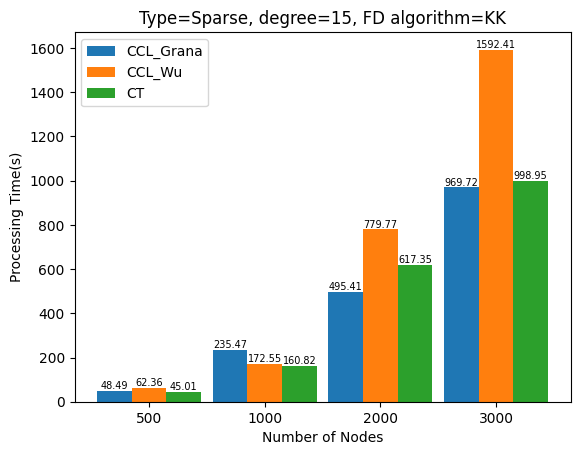

JIGGLE
[49.392, 221.703, 606.615, 1614.4950000000001]


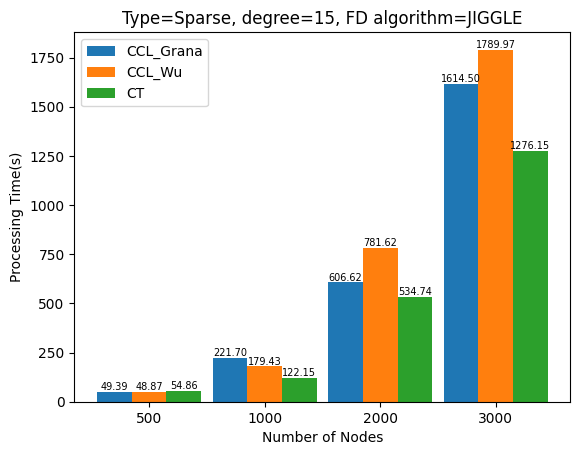

FA2
[93.759, 164.821, 680.1800000000001, 1455.108]


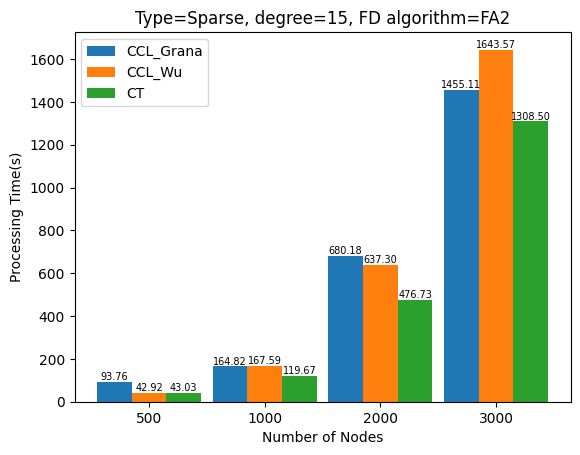

FR
[186.104, 163.959, 630.825, 1302.077]


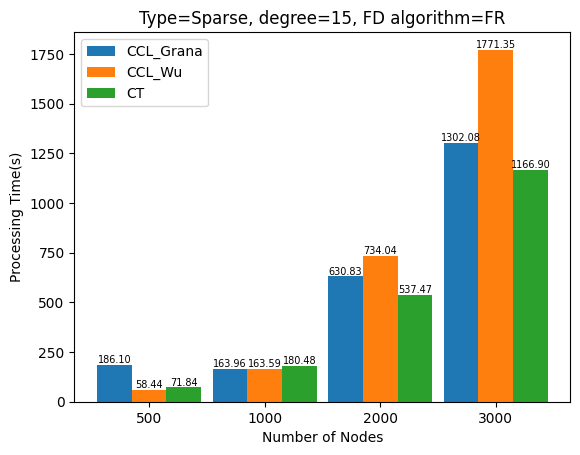

In [7]:
source_path = "../../Time"
file_name = "time.csv"
df = pd.read_csv(os.path.join(source_path, file_name))
# FD_list = ["DH","FA2","FRU"]
# FD_list = ["DH","FA2","FDGE","FR","FRU","JIGGLE","KK","KK_W"]
FD_list = ["KK","JIGGLE","FA2","FR"]

sorted_df = sort_data(df)
time_bar_generate(sorted_df, "Sparse", 15, FD_list)
